In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

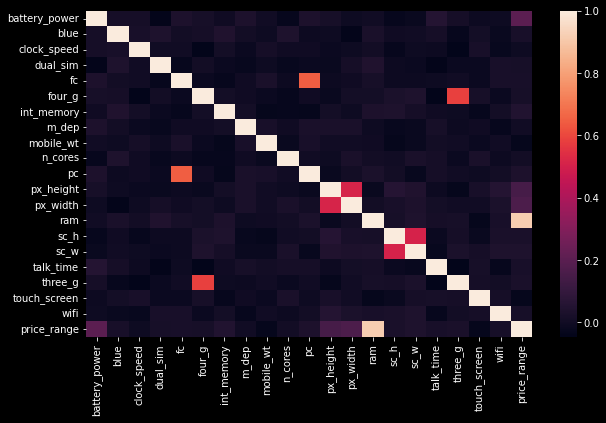

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())
plt.show()

# plotting relation between price range and battery power

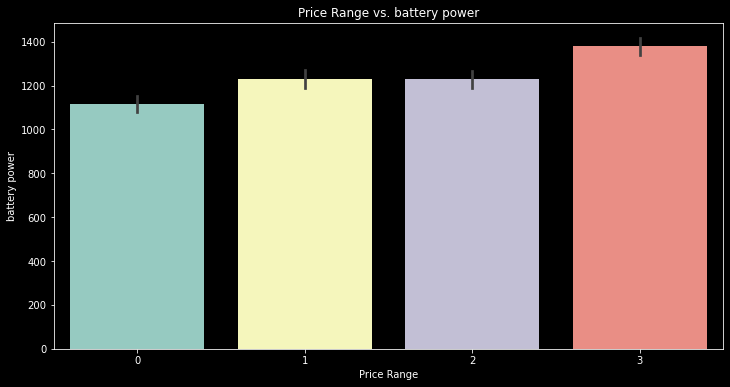

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='price_range', y='battery_power', data=df)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('battery power')
plt.title('Price Range vs. battery power')

# Show the plot
plt.show()

# plotting relation between price range and pixel hight & width

Text(0.5, 1.0, 'Price Range vs. Pixel Width')

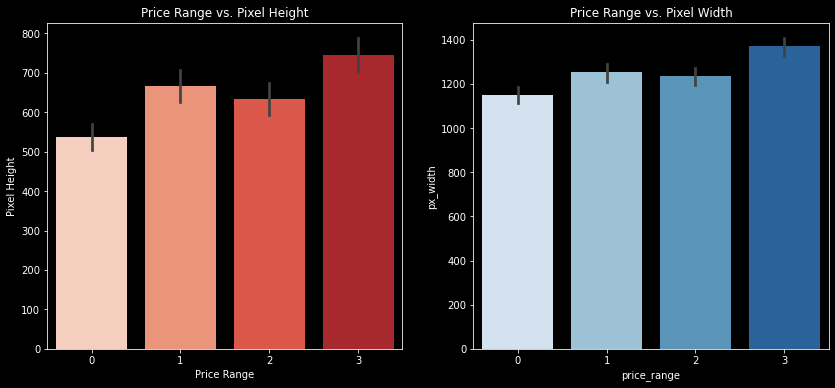

In [8]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # First subplot

# Create the bar plot for 'px_height' using seaborn with red color palette
sns.barplot(x='price_range', y='px_height', data=df, palette='Reds')

# Add labels and title for the first subplot
plt.xlabel('Price Range')
plt.ylabel('Pixel Height')
plt.title('Price Range vs. Pixel Height')

plt.subplot(1, 2, 2)  # Second subplot

# Create the bar plot for 'px_width' using seaborn with blue color palette
sns.barplot(x='price_range', y='px_width', data=df, palette='Blues')

# Add labels and title for the second subplot
plt.title('Price Range vs. Pixel Width')

# Plotting relationship between price range and RAM

<AxesSubplot:xlabel='price_range', ylabel='ram'>

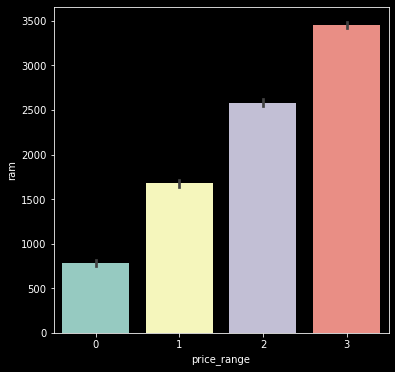

In [9]:
plt.figure(figsize=(6, 6))
sns.barplot(x='price_range', y='ram', data=df)


# Plotting relationship between price range and 3G/4G

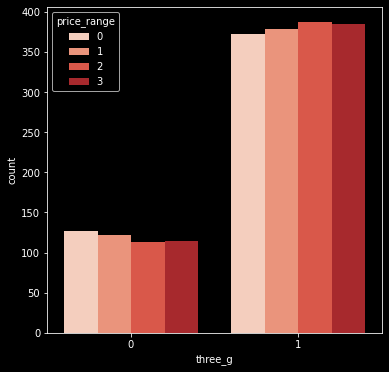

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.countplot(x='three_g', hue='price_range', data=df, palette='Reds')
plt.show()

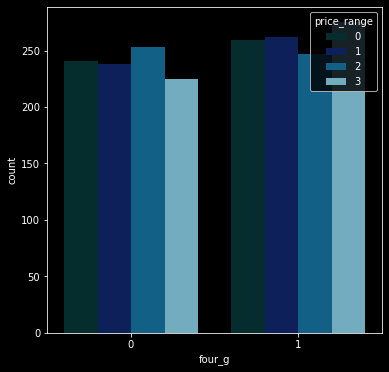

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.countplot(x='four_g', hue='price_range', data=df, palette='ocean')
plt.show()

# Plotting relationship between price range and memory

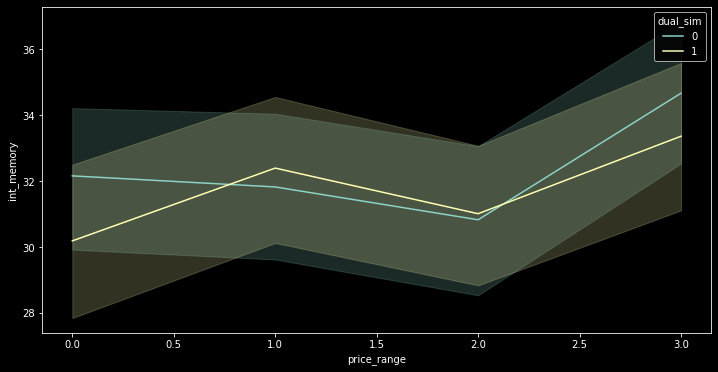

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='price_range', y='int_memory', data=df, hue='dual_sim')
plt.show()

# Data preprocessing

In [13]:
x=df.drop(['price_range'], axis=1)
y=df['price_range']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
knn.score(x_train, y_train)


0.9457142857142857

In [17]:
 predictions=knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.935